## Data Curation Project - Coca-Cola Company

### Aim of the project:
The aim of this data curation project is to curate coca-cola financial datasets from 2009 to 2019 and identify hidden patterns in the data that can be replicated in another brewery company. 

### Steps taken for the project:
-  Scrape financial report for the years 2009 to 2019.
-  Curate the datasets scraped from the internet.
-  Peform financial analysis and visualisation.
-  Identify patterns in the historical data that can be replicated in another brewery company.

#### Scope of the project:
As a consultant, I will need the following data to analyse a company's financial performance and find the hidden insights that can be replicated in my own company:
 
   a.  Profit-Loss Statement also known as Income Statement.

   b. Balance sheet

   c. Cash-flow statement
   
To analyse coca-cola financial performance using the aforementioned three statements, i need to calculate some metrics such as Sales Growth, Profitability (Operating profit margin and Net profit margin), Debt-Equity ratio, Current ratio (current assets/current liabilities), Net cash (Net Cash from operating, investing and financing).
   
##### Note: I will be using coca-cola financial reports from Stock Analysis on Net; COCA-COLA CO. (NYSE:KO)

------

#### Import relevant libraries

In [308]:
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Scrape and Curate the coca-cola company financial report for 2009 to 2019

In [309]:
url = 'https://www.stock-analysis-on.net/NYSE/Company/Coca-Cola-Co/Long-Term-Trends/Selected-Financial-Data'
page = requests.get(url)
page.status_code

200

In [310]:
soup = BeautifulSoup(page.text, 'html.parser')
#print(soup.prettify())

In [311]:
table1 = soup.find_all('div', class_='table-responsive')[0].table
table2 = soup.find_all('div', class_='table-responsive')[1].table
table3 = soup.find_all('div', class_='table-responsive')[2].table
table4 = soup.find_all('div', class_='table-responsive')[3].table
#table1

#### Create Income Statement dataframe

In [312]:
income_statement = []
headers = []
for header in table1.find_all('tr')[0].find_all('th'):
    headers.append(header.text)
for rows in table1.find_all('tr')[1:12]:
    values = []
    for cols in rows.find_all('td'):
        values.append(cols.text.strip())
    income_dict = {headers[i]:values[i] for i in range(len(values))}
    income_statement.append(income_dict)

In [313]:
income_statement = pd.DataFrame(income_statement)
income_statement

,12 months ended:,Net operating revenues,Operating income,Net income attributable to shareowners of The Coca-Cola Company
0,"Dec 31, 2019","37,266","10,086","8,920"
1,"Dec 31, 2018","31,856","8,700","6,434"
2,"Dec 31, 2017","35,410","7,501","1,248"
3,"Dec 31, 2016","41,863","8,626","6,527"
4,"Dec 31, 2015","44,294","8,728","7,351"
5,"Dec 31, 2014","45,998","9,708","7,098"
6,"Dec 31, 2013","46,854","10,228","8,584"
7,"Dec 31, 2012","48,017","10,779","9,019"
8,"Dec 31, 2011","46,542","10,154","8,572"
9,"Dec 31, 2010","35,119","8,449","11,809"


#### Create balance sheet-assets dataframe

In [314]:
balance_sheet_assets = []
headers = []
for header in table2.find_all('tr')[0].find_all('th'):
    headers.append(header.text)
for rows in table2.find_all('tr')[1:12]:
    values = []
    for cols in rows.find_all('td'):
        values.append(cols.text.strip())
    assets = {headers[i]:values[i] for i in range(len(values))}
    balance_sheet_assets.append(assets)

In [315]:
balance_sheet_assets = pd.DataFrame(balance_sheet_assets)
balance_sheet_assets

,,Current assets,Total assets
0,"Dec 31, 2019","20,411","86,381"
1,"Dec 31, 2018","30,634","83,216"
2,"Dec 31, 2017","36,545","87,896"
3,"Dec 31, 2016","34,010","87,270"
4,"Dec 31, 2015","33,395","90,093"
5,"Dec 31, 2014","32,986","92,023"
6,"Dec 31, 2013","31,304","90,055"
7,"Dec 31, 2012","30,328","86,174"
8,"Dec 31, 2011","25,497","79,974"
9,"Dec 31, 2010","21,579","72,921"


#### Create balance sheet-liabilities dataframe

In [316]:
balance_sheet_liabilities = []
headers = []
for header in table3.find_all('tr')[0].find_all('th'):
    headers.append(header.text)
for rows in table3.find_all('tr')[1:12]:
    values = []
    for cols in rows.find_all('td'):
        values.append(cols.text.strip())
    liabilities = {headers[i]:values[i] for i in range(len(values))}
    balance_sheet_liabilities.append(liabilities)

In [317]:
balance_sheet_liabilities = pd.DataFrame(balance_sheet_liabilities)
balance_sheet_liabilities

,,Current liabilities,Total debt,Equity attributable to shareowners of The Coca-Cola Company
0,"Dec 31, 2019","26,973","42,763","18,981"
1,"Dec 31, 2018","29,223","43,555","16,981"
2,"Dec 31, 2017","27,194","47,685","17,072"
3,"Dec 31, 2016","26,532","45,709","23,062"
4,"Dec 31, 2015","26,930","44,213","25,554"
5,"Dec 31, 2014","32,374","41,745","30,320"
6,"Dec 31, 2013","27,811","37,079","33,173"
7,"Dec 31, 2012","27,821","32,610","32,790"
8,"Dec 31, 2011","24,283","28,568","31,635"
9,"Dec 31, 2010","18,508","23,417","31,003"


#### Create cash flow statement dataframe

In [318]:
cash_flow_statement = []
headers = []
for header in table4.find_all('tr')[0].find_all('th'):
    headers.append(header.text)
for rows in table4.find_all('tr')[1:12]:
    values = []
    for cols in rows.find_all('td'):
        values.append(cols.text.strip())
    cash_flow_dict = {headers[i]:values[i] for i in range(len(values))}
    cash_flow_statement.append(cash_flow_dict)

In [319]:
cash_flow_statement = pd.DataFrame(cash_flow_statement)
cash_flow_statement

,12 months ended:,Net cash provided by operating activities,Net cash (used in) provided by investing activities,Net cash provided by (used in) financing activities
0,"Dec 31, 2019","10,471","(3,976)","(9,004)"
1,"Dec 31, 2018","7,320","6,348","(10,552)"
2,"Dec 31, 2017","6,995","(2,385)","(7,409)"
3,"Dec 31, 2016","8,796",(999),"(6,545)"
4,"Dec 31, 2015","10,528","(6,186)","(5,113)"
5,"Dec 31, 2014","10,615","(7,506)","(3,631)"
6,"Dec 31, 2013","10,542","(4,214)","(3,745)"
7,"Dec 31, 2012","10,645","(11,404)","(3,347)"
8,"Dec 31, 2011","9,474","(2,524)","(2,234)"
9,"Dec 31, 2010","9,532","(4,405)","(3,465)"


#### Clean the four combined dataframes before analysing coca-cola company's  financial performance

In [320]:
balance_sheet_assets.columns = ['12 months ended:','Current assets', 'Total assets']
balance_sheet_liabilities.columns = ['12 months ended:', 'Current liabilities','Total debt','Equity attributable to shareholders']


In [321]:
financial_data = pd.concat([income_statement, balance_sheet_assets, balance_sheet_liabilities, cash_flow_statement], axis=1)
financial_data.head()

,12 months ended:,Net operating revenues,Operating income,Net income attributable to shareowners of The Coca-Cola Company,12 months ended:,Current assets,Total assets,12 months ended:,Current liabilities,Total debt,Equity attributable to shareholders,12 months ended:,Net cash provided by operating activities,Net cash (used in) provided by investing activities,Net cash provided by (used in) financing activities
0,"Dec 31, 2019","37,266","10,086","8,920","Dec 31, 2019","20,411","86,381","Dec 31, 2019","26,973","42,763","18,981","Dec 31, 2019","10,471","(3,976)","(9,004)"
1,"Dec 31, 2018","31,856","8,700","6,434","Dec 31, 2018","30,634","83,216","Dec 31, 2018","29,223","43,555","16,981","Dec 31, 2018","7,320","6,348","(10,552)"
2,"Dec 31, 2017","35,410","7,501","1,248","Dec 31, 2017","36,545","87,896","Dec 31, 2017","27,194","47,685","17,072","Dec 31, 2017","6,995","(2,385)","(7,409)"
3,"Dec 31, 2016","41,863","8,626","6,527","Dec 31, 2016","34,010","87,270","Dec 31, 2016","26,532","45,709","23,062","Dec 31, 2016","8,796",(999),"(6,545)"
4,"Dec 31, 2015","44,294","8,728","7,351","Dec 31, 2015","33,395","90,093","Dec 31, 2015","26,930","44,213","25,554","Dec 31, 2015","10,528","(6,186)","(5,113)"


In [322]:
financial_data.drop(financial_data.iloc[:,[4,7,11]], axis=1, inplace=True)
financial_data.head()

,Net operating revenues,Operating income,Net income attributable to shareowners of The Coca-Cola Company,Current assets,Total assets,Current liabilities,Total debt,Equity attributable to shareholders,Net cash provided by operating activities,Net cash (used in) provided by investing activities,Net cash provided by (used in) financing activities
0,"37,266","10,086","8,920","20,411","86,381","26,973","42,763","18,981","10,471","(3,976)","(9,004)"
1,"31,856","8,700","6,434","30,634","83,216","29,223","43,555","16,981","7,320","6,348","(10,552)"
2,"35,410","7,501","1,248","36,545","87,896","27,194","47,685","17,072","6,995","(2,385)","(7,409)"
3,"41,863","8,626","6,527","34,010","87,270","26,532","45,709","23,062","8,796",(999),"(6,545)"
4,"44,294","8,728","7,351","33,395","90,093","26,930","44,213","25,554","10,528","(6,186)","(5,113)"


In [323]:
financial_data.index = '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009'

In [324]:
financial_data

,Net operating revenues,Operating income,Net income attributable to shareowners of The Coca-Cola Company,Current assets,Total assets,Current liabilities,Total debt,Equity attributable to shareholders,Net cash provided by operating activities,Net cash (used in) provided by investing activities,Net cash provided by (used in) financing activities
2019,"37,266","10,086","8,920","20,411","86,381","26,973","42,763","18,981","10,471","(3,976)","(9,004)"
2018,"31,856","8,700","6,434","30,634","83,216","29,223","43,555","16,981","7,320","6,348","(10,552)"
2017,"35,410","7,501","1,248","36,545","87,896","27,194","47,685","17,072","6,995","(2,385)","(7,409)"
2016,"41,863","8,626","6,527","34,010","87,270","26,532","45,709","23,062","8,796",(999),"(6,545)"
2015,"44,294","8,728","7,351","33,395","90,093","26,930","44,213","25,554","10,528","(6,186)","(5,113)"
2014,"45,998","9,708","7,098","32,986","92,023","32,374","41,745","30,320","10,615","(7,506)","(3,631)"
2013,"46,854","10,228","8,584","31,304","90,055","27,811","37,079","33,173","10,542","(4,214)","(3,745)"
2012,"48,017","10,779","9,019","30,328","86,174","27,821","32,610","32,790","10,645","(11,404)","(3,347)"
2011,"46,542","10,154","8,572","25,497","79,974","24,283","28,568","31,635","9,474","(2,524)","(2,234)"
2010,"35,119","8,449","11,809","21,579","72,921","18,508","23,417","31,003","9,532","(4,405)","(3,465)"


In [325]:
#financial_data.info()

In [326]:
financial_data.replace(',','', regex=True, inplace=True)
financial_data

,Net operating revenues,Operating income,Net income attributable to shareowners of The Coca-Cola Company,Current assets,Total assets,Current liabilities,Total debt,Equity attributable to shareholders,Net cash provided by operating activities,Net cash (used in) provided by investing activities,Net cash provided by (used in) financing activities
2019,37266,10086,8920,20411,86381,26973,42763,18981,10471,(3976),(9004)
2018,31856,8700,6434,30634,83216,29223,43555,16981,7320,6348,(10552)
2017,35410,7501,1248,36545,87896,27194,47685,17072,6995,(2385),(7409)
2016,41863,8626,6527,34010,87270,26532,45709,23062,8796,(999),(6545)
2015,44294,8728,7351,33395,90093,26930,44213,25554,10528,(6186),(5113)
2014,45998,9708,7098,32986,92023,32374,41745,30320,10615,(7506),(3631)
2013,46854,10228,8584,31304,90055,27811,37079,33173,10542,(4214),(3745)
2012,48017,10779,9019,30328,86174,27821,32610,32790,10645,(11404),(3347)
2011,46542,10154,8572,25497,79974,24283,28568,31635,9474,(2524),(2234)
2010,35119,8449,11809,21579,72921,18508,23417,31003,9532,(4405),(3465)


In [327]:
financial_data['Net cash (used in) provided by investing activities'] = financial_data['Net cash (used in) provided by investing activities'].str.strip('()')
financial_data['Net cash provided by (used in) financing activities'] = financial_data['Net cash provided by (used in) financing activities'].str.strip('()')
financial_data

,Net operating revenues,Operating income,Net income attributable to shareowners of The Coca-Cola Company,Current assets,Total assets,Current liabilities,Total debt,Equity attributable to shareholders,Net cash provided by operating activities,Net cash (used in) provided by investing activities,Net cash provided by (used in) financing activities
2019,37266,10086,8920,20411,86381,26973,42763,18981,10471,3976,9004
2018,31856,8700,6434,30634,83216,29223,43555,16981,7320,6348,10552
2017,35410,7501,1248,36545,87896,27194,47685,17072,6995,2385,7409
2016,41863,8626,6527,34010,87270,26532,45709,23062,8796,999,6545
2015,44294,8728,7351,33395,90093,26930,44213,25554,10528,6186,5113
2014,45998,9708,7098,32986,92023,32374,41745,30320,10615,7506,3631
2013,46854,10228,8584,31304,90055,27811,37079,33173,10542,4214,3745
2012,48017,10779,9019,30328,86174,27821,32610,32790,10645,11404,3347
2011,46542,10154,8572,25497,79974,24283,28568,31635,9474,2524,2234
2010,35119,8449,11809,21579,72921,18508,23417,31003,9532,4405,3465


In [328]:
financial_data = financial_data.astype(int)

In [329]:
financial_data.index = pd.to_datetime(financial_data.index)
financial_data.index.name = ''

In [330]:
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2019-01-01 to 2009-01-01
Data columns (total 11 columns):
 #   Column                                                           Non-Null Count  Dtype
---  ------                                                           --------------  -----
 0   Net operating revenues                                           11 non-null     int32
 1   Operating income                                                 11 non-null     int32
 2   Net income attributable to shareowners of The Coca-Cola Company  11 non-null     int32
 3   Current assets                                                   11 non-null     int32
 4   Total assets                                                     11 non-null     int32
 5   Current liabilities                                              11 non-null     int32
 6   Total debt                                                       11 non-null     int32
 7   Equity attributable to shareholders         

In [331]:
financial_data.columns = ['Net sales', 'Operating income', 'Net income' ,'Current assets', 'Total assets', 'Current liabilities', 'Total debt','Equity', 'Net cash (operating)', 'Net cash (investing)', 'Net cash (financing)' ]

In [332]:
financial_data.index.name = 'Financial Year (US$ in millions)'

#### Financial Analysis and Visualization to derive insights from the company's data

In [333]:
plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(8, 5))

#### SALES GROWTH OVER TIME:

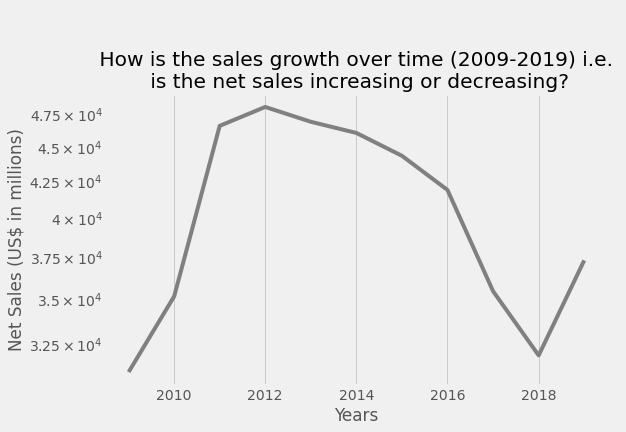

In [334]:
fig, ax = plt.subplots()
ax.plot(financial_data.index, financial_data['Net sales'], color='grey')
ax.set_title('\n\n How is the sales growth over time (2009-2019) i.e. \n is the net sales increasing or decreasing?')
ax.set_xlabel('Years')
ax.set_ylabel('Net Sales (US$ in millions)')
ax.set_yscale('log')
plt.show()

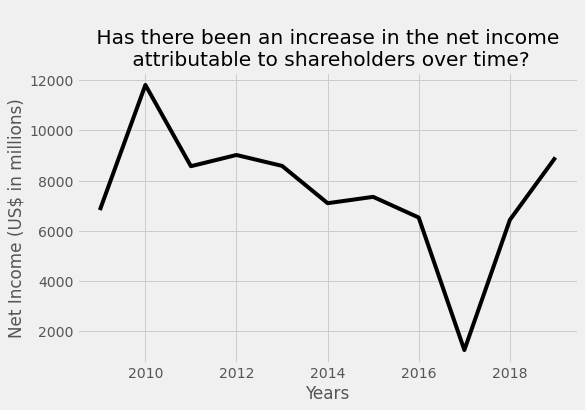

In [335]:
fig, ax = plt.subplots()
ax.plot(financial_data.index, financial_data['Net income'], color='black')
ax.set_title('\n Has there been an increase in the net income \n attributable to shareholders over time?')
ax.set_xlabel('Years')
ax.set_ylabel('Net Income (US$ in millions)')
plt.show()

#### PROFITABILITY OF COCA-COLA COMPANY

In [336]:
financial_data['Operating profit margin'] = round(financial_data['Operating income'] / financial_data['Net sales'] * 100)
financial_data['Net profit margin'] = round(financial_data['Net income'] / financial_data['Net sales'] * 100)
financial_data.head()

,Net sales,Operating income,Net income,Current assets,Total assets,Current liabilities,Total debt,Equity,Net cash (operating),Net cash (investing),Net cash (financing),Operating profit margin,Net profit margin
Financial Year (US$ in millions),,,,,,,,,,,,,
2019-01-01,37266,10086,8920,20411,86381,26973,42763,18981,10471,3976,9004,27.0,24.0
2018-01-01,31856,8700,6434,30634,83216,29223,43555,16981,7320,6348,10552,27.0,20.0
2017-01-01,35410,7501,1248,36545,87896,27194,47685,17072,6995,2385,7409,21.0,4.0
2016-01-01,41863,8626,6527,34010,87270,26532,45709,23062,8796,999,6545,21.0,16.0
2015-01-01,44294,8728,7351,33395,90093,26930,44213,25554,10528,6186,5113,20.0,17.0


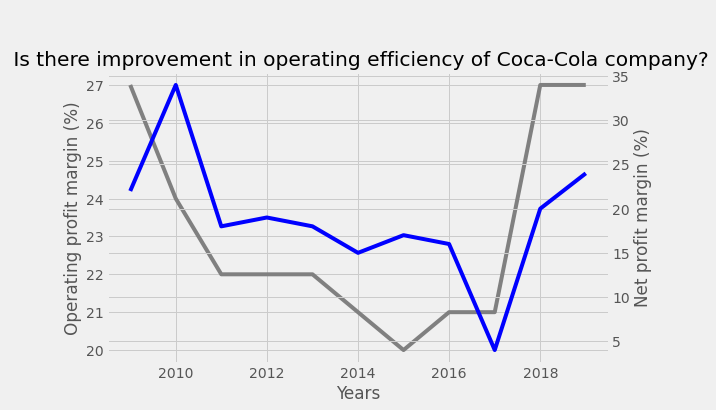

In [337]:
fig, ax = plt.subplots()
ax.plot(financial_data.index, financial_data['Operating profit margin'], color='grey', label = 'OPM')
ax2 = ax.twinx()
ax2.plot(financial_data.index, financial_data['Net profit margin'], color='blue', label = 'NPM')
ax.set_title('\n\n Is there improvement in operating efficiency of Coca-Cola company?')
ax.set_xlabel('Years')
ax.set_ylabel('Operating profit margin (%)')
ax2.set_ylabel('Net profit margin (%)')
plt.show()

#### DEBT-TO-EQUITY RATIO

In [338]:
financial_data['debt-equity ratio'] = round(financial_data['Total debt'] / financial_data['Equity'], 1)
financial_data.head()

,Net sales,Operating income,Net income,Current assets,Total assets,Current liabilities,Total debt,Equity,Net cash (operating),Net cash (investing),Net cash (financing),Operating profit margin,Net profit margin,debt-equity ratio
Financial Year (US$ in millions),,,,,,,,,,,,,,
2019-01-01,37266,10086,8920,20411,86381,26973,42763,18981,10471,3976,9004,27.0,24.0,2.3
2018-01-01,31856,8700,6434,30634,83216,29223,43555,16981,7320,6348,10552,27.0,20.0,2.6
2017-01-01,35410,7501,1248,36545,87896,27194,47685,17072,6995,2385,7409,21.0,4.0,2.8
2016-01-01,41863,8626,6527,34010,87270,26532,45709,23062,8796,999,6545,21.0,16.0,2.0
2015-01-01,44294,8728,7351,33395,90093,26930,44213,25554,10528,6186,5113,20.0,17.0,1.7


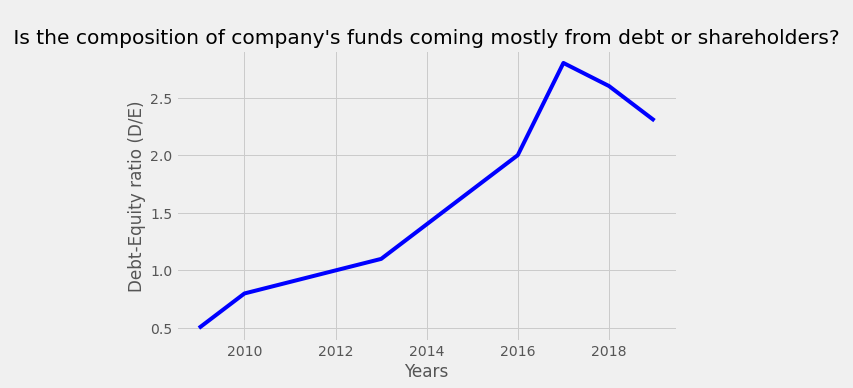

In [339]:
fig, ax = plt.subplots()
ax.plot(financial_data.index, financial_data['debt-equity ratio'], color='blue')
ax.set_title("\n Is the composition of company's funds coming mostly from debt or shareholders? ")
ax.set_xlabel('Years')
ax.set_ylabel('Debt-Equity ratio (D/E)')
plt.show()

#### Current ratio (CR)

In [340]:
financial_data['Current Ratio'] = round(financial_data['Current assets'] / financial_data['Current liabilities'], 1)
financial_data.head()

,Net sales,Operating income,Net income,Current assets,Total assets,Current liabilities,Total debt,Equity,Net cash (operating),Net cash (investing),Net cash (financing),Operating profit margin,Net profit margin,debt-equity ratio,Current Ratio
Financial Year (US$ in millions),,,,,,,,,,,,,,,
2019-01-01,37266,10086,8920,20411,86381,26973,42763,18981,10471,3976,9004,27.0,24.0,2.3,0.8
2018-01-01,31856,8700,6434,30634,83216,29223,43555,16981,7320,6348,10552,27.0,20.0,2.6,1.0
2017-01-01,35410,7501,1248,36545,87896,27194,47685,17072,6995,2385,7409,21.0,4.0,2.8,1.3
2016-01-01,41863,8626,6527,34010,87270,26532,45709,23062,8796,999,6545,21.0,16.0,2.0,1.3
2015-01-01,44294,8728,7351,33395,90093,26930,44213,25554,10528,6186,5113,20.0,17.0,1.7,1.2


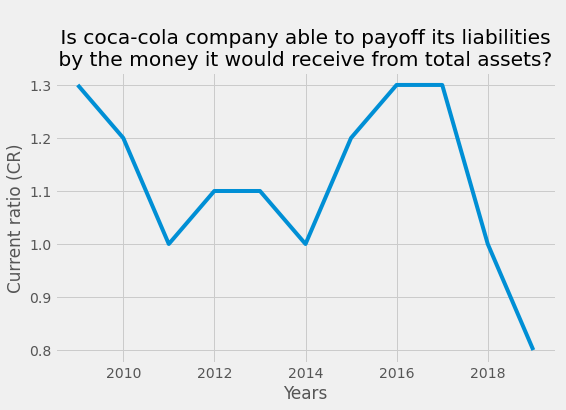

In [341]:
fig, ax = plt.subplots()
ax.plot(financial_data.index, financial_data['Current Ratio'])
ax.set_title("\n Is coca-cola company able to payoff its liabilities \n by the money it would receive from total assets? ")
ax.set_xlabel('Years')
ax.set_ylabel('Current ratio (CR)')
plt.show()

#### NET CASH FLOW OVER TIME

In [342]:
financial_data.iat[1,9] = -6348

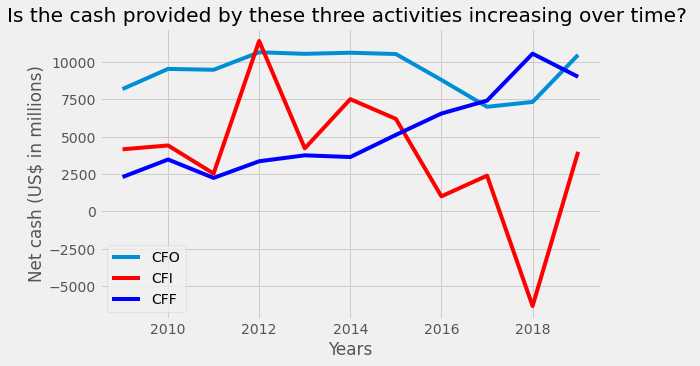

In [343]:
fig, ax = plt.subplots()
ax.plot(financial_data.index, financial_data['Net cash (operating)'], label = 'CFO')
ax.plot(financial_data.index, financial_data['Net cash (investing)'], label= 'CFI', color='red')
ax.plot(financial_data.index, financial_data['Net cash (financing)'], label= 'CFF', color='blue')
ax.set_title("Is the cash provided by these three activities increasing over time? ")
ax.set_xlabel('Years')
ax.set_ylabel('Net cash (US$ in millions)')
ax.legend()
plt.show()

In [344]:
financial_data['Net Cash'] = financial_data['Net cash (operating)'] + financial_data['Net cash (investing)'] + financial_data['Net cash (financing)']
financial_data.head()

,Net sales,Operating income,Net income,Current assets,Total assets,Current liabilities,Total debt,Equity,Net cash (operating),Net cash (investing),Net cash (financing),Operating profit margin,Net profit margin,debt-equity ratio,Current Ratio,Net Cash
Financial Year (US$ in millions),,,,,,,,,,,,,,,,
2019-01-01,37266,10086,8920,20411,86381,26973,42763,18981,10471,3976,9004,27.0,24.0,2.3,0.8,23451
2018-01-01,31856,8700,6434,30634,83216,29223,43555,16981,7320,-6348,10552,27.0,20.0,2.6,1.0,11524
2017-01-01,35410,7501,1248,36545,87896,27194,47685,17072,6995,2385,7409,21.0,4.0,2.8,1.3,16789
2016-01-01,41863,8626,6527,34010,87270,26532,45709,23062,8796,999,6545,21.0,16.0,2.0,1.3,16340
2015-01-01,44294,8728,7351,33395,90093,26930,44213,25554,10528,6186,5113,20.0,17.0,1.7,1.2,21827


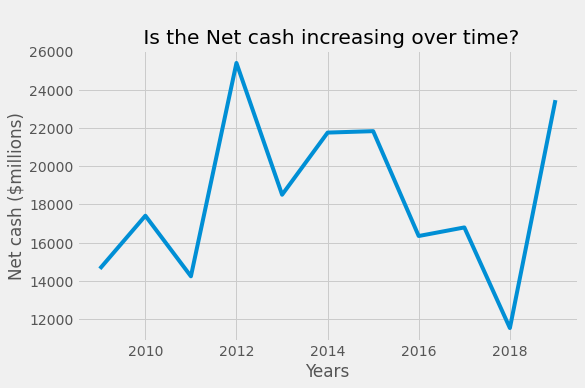

In [345]:
fig, ax = plt.subplots()
ax.plot(financial_data.index, financial_data['Net Cash'])
ax.set_title("\n Is the Net cash increasing over time?")
ax.set_xlabel('Years')
ax.set_ylabel('Net cash ($millions)')
plt.show()

In [346]:
financial_data = financial_data.reset_index()
financial_data.sort_values('Financial Year (US$ in millions)', inplace=True)

In [347]:
financial_data['Cash (at the end of year)'] = financial_data['Net Cash'].cumsum(axis=0)

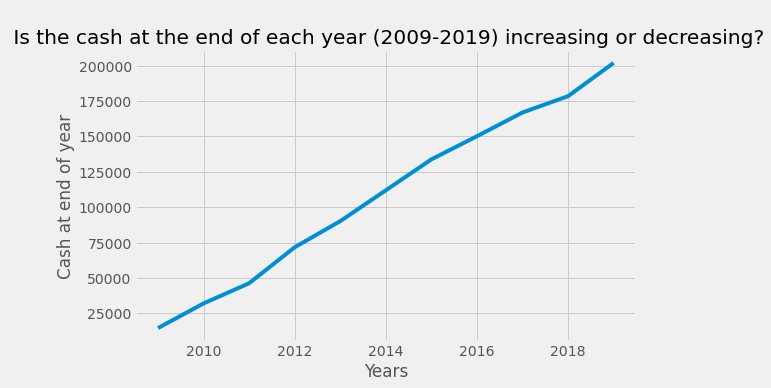

In [348]:
fig, ax = plt.subplots()
ax.plot(financial_data['Financial Year (US$ in millions)'], financial_data['Cash (at the end of year)'])
ax.set_title("\n Is the cash at the end of each year (2009-2019) increasing or decreasing?")
ax.set_xlabel('Years')
ax.set_ylabel('Cash at end of year')
plt.show()

In [349]:
financial_data

,Financial Year (US$ in millions),Net sales,Operating income,Net income,Current assets,Total assets,Current liabilities,Total debt,Equity,Net cash (operating),Net cash (investing),Net cash (financing),Operating profit margin,Net profit margin,debt-equity ratio,Current Ratio,Net Cash,Cash (at the end of year)
10,2009-01-01,30990,8231,6824,17551,48671,13721,11859,24799,8186,4149,2293,27.0,22.0,0.5,1.3,14628,14628
9,2010-01-01,35119,8449,11809,21579,72921,18508,23417,31003,9532,4405,3465,24.0,34.0,0.8,1.2,17402,32030
8,2011-01-01,46542,10154,8572,25497,79974,24283,28568,31635,9474,2524,2234,22.0,18.0,0.9,1.0,14232,46262
7,2012-01-01,48017,10779,9019,30328,86174,27821,32610,32790,10645,11404,3347,22.0,19.0,1.0,1.1,25396,71658
6,2013-01-01,46854,10228,8584,31304,90055,27811,37079,33173,10542,4214,3745,22.0,18.0,1.1,1.1,18501,90159
5,2014-01-01,45998,9708,7098,32986,92023,32374,41745,30320,10615,7506,3631,21.0,15.0,1.4,1.0,21752,111911
4,2015-01-01,44294,8728,7351,33395,90093,26930,44213,25554,10528,6186,5113,20.0,17.0,1.7,1.2,21827,133738
3,2016-01-01,41863,8626,6527,34010,87270,26532,45709,23062,8796,999,6545,21.0,16.0,2.0,1.3,16340,150078
2,2017-01-01,35410,7501,1248,36545,87896,27194,47685,17072,6995,2385,7409,21.0,4.0,2.8,1.3,16789,166867
1,2018-01-01,31856,8700,6434,30634,83216,29223,43555,16981,7320,-6348,10552,27.0,20.0,2.6,1.0,11524,178391
